In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import time

__1.__ _Dot product:_ Write a short program (using 1D arrays and single loop) to calculate the product $a \cdot b$ where $a$ and $b$ are vectors of the same length $n$. 

In [2]:
n = 3
a = np.random.random(n)
b = np.random.random(n)
dot_prod = 0
for i in range(n):
    dot_prod += a[i] * b[i]    
print("vector a =", a)
print("vector b =", b)
print("dot product =", dot_prod)

vector a = [0.12537854 0.42807363 0.87958805]
vector b = [0.66866537 0.8955177  0.51942318]
dot product = 0.9240622259223301


__2.__ _Cross product:_ Write a short program (using 1D arrays and two nested loops) to calculate the product $a \times b$ where $a$ and $b$ are vectors of the same length $n$. 

In [3]:
n = 3
a = np.random.random(n)
b = np.random.random(n)
cross_prod = np.zeros(n)
for i in range(n):
    cross_prod[i] += a[(i+1)%n] * b[(i+2)%n] - a[(i+2)%n] * b[(i+1)%n]
print("vector a =", a)
print("vector b =", b)
print("cross product =", cross_prod)

vector a = [0.22545276 0.74706825 0.14361931]
vector b = [0.18917186 0.12821377 0.66201366]
cross product = [ 0.47615541 -0.12208407 -0.11241814]


__3.__ Matrix-matrix multiplication:_ Write a simple code to calculate explicitly $A \times A$, where $A$ is an $n \times n$ matrix. 

In [4]:
n = 2
A = np.random.random((n, n))
AxA = np.zeros((n, n))
for i in range(n):
    for j in range(n):
        for k in range(n):
            AxA[i][j] += A[i][k] * A[k][j]
print("matrix A =", A)
print("A x A = ", AxA)

matrix A = [[0.73767179 0.35133578]
 [0.16046439 0.37628426]]
A x A =  [[0.60053654 0.39137262]
 [0.17875027 0.19796673]]


__4.__ Plot CPU-time versus $n$, and determine the complexity of your implementation for the previous exercise. 


In [5]:
cpu_time = []
matrix_size = np.arange(2, 100)
for n in matrix_size:
    start = time.time()
    A = np.random.random((n, n))
    A2 = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            for k in range(n):
                A2[i][j] += A[i][k] * A[k][j]
    stop = time.time()
    cpu_time.append(stop - start)

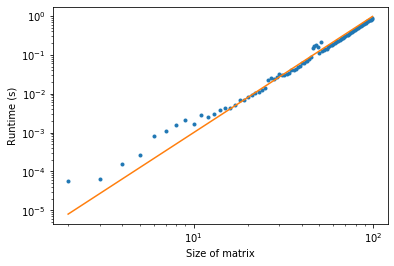

In [6]:
plt.xlabel("Size of matrix")
plt.ylabel("Runtime (s)")
plt.loglog(matrix_size, cpu_time, '.')
plt.loglog(matrix_size, 10**-6 * (matrix_size**3));

- complexity of matrix multiplication is $O(n^3)$ 

__5.__ What is meant by sub-linear scaling? Give some examples. 

__6.__ _Sort:_ Implement either merge or bubble sort algorithm to sort an array of random real values. Plot the CPU-time versus the array length $n$, and determine the complexity of your implementation. Is it $O(n\log(n))$? 

In [7]:
def merge_sort(list):
    if len(list) <= 1:
        return list
    left = []
    right = []
    for i in range(len(list)):
        if i < len(list) / 2:
            left.append(list[i])
        else:
            right.append(list[i])
    left = merge_sort(left)
    right = merge_sort(right)
    return merge(left, right)

In [8]:
def merge(left, right):
    result = []
    while left != [] and right != []:
        if left[0] >= right[0]:
            result.append(left[0])
            left = left[1:]
        else:
            result.append(right[0])
            right = right[1:]
    while left != []:
        result.append(left[0])
        left = left[1:]
    while right != []:
        result.append(right[0])
        right = right[1:]
    return result

In [9]:
cpu_time = []
array_size = np.arange(1, 1000)
for n in array_size:
    array = np.random.random(n)
    start = time.time()
    merge_sort(array)
    stop = time.time()
    cpu_time.append(stop - start)

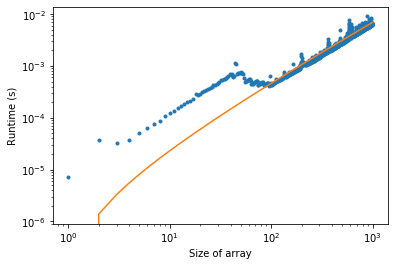

In [10]:
plt.xlabel("Size of array")
plt.ylabel("Runtime (s)")
plt.loglog(array_size, cpu_time, '.')
plt.loglog(array_size, 10**-6 * (array_size * np.log(array_size)));

- Complexity of matrix multiplication is $O(n\;log(n))$ 

__7.__ Show, with examples, that the following expression may become invalid when treated numerically: $(\frac{i}{j})j = i$ and $(x+y)-y = x$. 

In [11]:
i = 1
j = 10
div = np.float32(i / j)
print(div * j == i)

False


In [12]:
x = 0.1
y = 0.2
print((x + y) - y == x)

False


__8.__ _Rounding error:_ Sum up $\frac{1}{n}$, where $n=1, 2, 3, ..., 100000$. Then sum up $\frac{1}{n}$, where $n= 100000, 99999, ..., 2, 1$. Explain any unexpected observation while using single or double precision variables. 

In [13]:
# double precision
sum_up = np.float64(0)
for i in range(1, 10001):
    sum_up += np.float64(1 / i)
print("double precision =", sum_up)
sum_down = np.float64(0)
for i in range(10000, 0, -1):
    sum_down += np.float64(1 / i)
print("double precision =", sum_down)

# single precision
sum_up = np.float32(0)
for i in range(1, 10001):
    sum_up += np.float32(1 / i)
print("single precision =", sum_up)
sum_down = np.float32(0)
for i in range(10000, 0, -1):
    sum_down += np.float32(1 / i)
print("single precision =", sum_down)

double precision = 9.787606036044348
double precision = 9.787606036044386
single precision = 9.787613
single precision = 9.787604


__9.__ Write a short computer program to calculate [the alternating harmonic series](https://en.wikipedia.org/wiki/Harmonic_series_(mathematics)#Alternating_harmonic_series). Compare your result with the exact value, $\ln(2) $, and try to improve the accuracy as much as possible. 

In [14]:
# 1st method
series_sum_up = 0
for n in range(1, 10001):
    series_sum_up += (-1)**(n + 1) / n
print("1st method =", abs(np.log(2) - series_sum_up))

# 2nd method
series_sum_down = 0
for n in range(10000, 0, -1):
    series_sum_down += (-1)**(n + 1) / n
print("2nd method =", abs(np.log(2) - series_sum_down))

# 3rd method
sum_positive = 0
sum_negative = 0
for n in range(1, 10001, 2):
    sum_positive += (-1)**(n + 1) / n
    sum_negative += (-1)**(n + 2) / (n+1)
sum_up = sum_positive + sum_negative
print("3rd method =", abs(np.log(2) - sum_up))

# 4th method
sum_positive = 0
sum_negative = 0
for n in range(10000, 0, -2):
    sum_negative += (-1)**(n + 1) / n
    sum_positive += (-1)**n / (n - 1)
sum_down = sum_positive + sum_negative
print("4th method =", abs(np.log(2) - sum_down))

1st method = 4.999749998702008e-05
2nd method = 4.999750000000969e-05
3rd method = 4.999749999157199e-05
4th method = 4.999749999690106e-05


For the best accuracy we can raise up summation iteration and/or use first method.

__10.__ _Finite difference error scaling:_ Plot the error of FD approximating of the 1st and 2nd derivatives of $\exp(x)$ at $x=1$ against the step size. 

In [15]:
x = 1
h_list = 1.1**-np.arange(500)
error = []
for h in h_list:
    error.append(abs((np.exp(x + h) - np.exp(x)) / h - np.exp(x)))

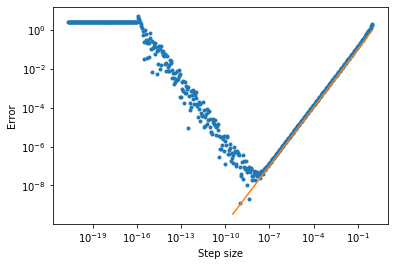

In [16]:
plt.xlabel("Step size")
plt.ylabel("Error")
plt.loglog(h_list, error, '.')
plt.loglog(h_list[:230], h_list[:230]);

- 1st derivative error is $O(n)$ 

In [17]:
x = 1
h_list = 1.1**-np.arange(200)
error = []
for h in h_list:
    error.append(abs((np.exp(x + h) - 2 * np.exp(x) + np.exp(x - h)) / h**2 - np.exp(x)))

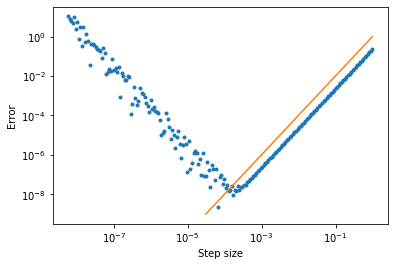

In [18]:
plt.xlabel("Step size")
plt.ylabel("Error")
plt.loglog(h_list, error, '.')
plt.loglog(h_list[:110], h_list[:110]**2);

- 2nd derivative error is $O(n^2)$ 

__11.__ Find iteratively the root(s) of $f(x)=\cos(x)-x$ using the bisection method. Plot the distance from the analytic solution versus the iteration count. 

In [19]:
def f(x):
    return np.cos(x) - x

up = -10
down = 10
root = 0.73908513321516064166
counter = 0
error = []
while abs(up - down) >= 1e-7:
    mean = (up + down) / 2
    error.append(root - mean)
    if f(mean) < 0 and f(mean) > f(down):
        down = mean
    elif f(mean) > 0 and f(mean) < f(up):
        up = mean
    counter += 1
print("steps =", counter)
print("minimum =", mean)

steps = 28
minimum = 0.7390851527452469


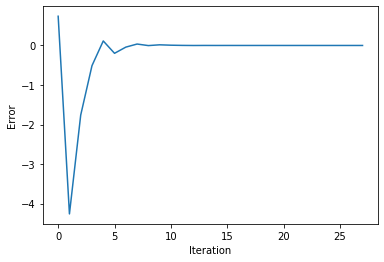

In [20]:
plt.xlabel("Iteration")
plt.ylabel("Error")
plt.plot(error);

__12.__ Find iteratively the root(s) of $f(x)=\cos(x)-x$ using the Newton-Raphson method. Plot the distance from the analytic solution versus the iteration count and compare it with the bisection method result. 

In [21]:
def f(x):
    return np.cos(x) - x

def f_prime(x):
    return -np.sin(x) - 1

x = -1.0
x_pre = -1.1
root = 0.73908513321516064166
counter = 0
error = []
while abs(x - x_pre) >= 1e-7:
    x_pre = x
    x = x - f(x) / f_prime(x)
    error.append(root - x)
    counter += 1
print("steps =", counter)
print("root =", x)

steps = 8
root = 0.7390851332151607


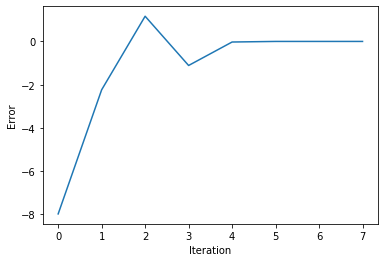

In [22]:
plt.xlabel("Iteration")
plt.ylabel("Error")
plt.plot(error);

__13.__ _Energy minimization:_ Where is the minimum of the Lennard-Jones potential $U(r)=4\epsilon[(\frac{\sigma}{r})^{12}-(\frac{\sigma}{r})^6]$? (Do it analytically!) Write a program to find numerically the equilibrium distance (corresponding to the minimum potential energy) of the LJ potential using the Newton's method. 

In [23]:
epsilon = 1
sigma = 1

def lj_p(r):
    return -24 * epsilon * (sigma / r)**6 * (2 * (sigma / r)**6 - 1) / r

def lj_pp(r):
    return 24 * epsilon * (sigma/ r)**6 * (26 * (sigma / r)**6 - 7) / r**2

r = 1.0
r_pre = 1.1
counter = 0
error = []
while abs(r - r_pre) >= 1e-7:
    r_pre = r
    r = r - lj_p(r) / lj_pp(r)
    counter += 1
print("steps =", counter)
print("minimum =", r)

steps = 7
minimum = 1.122462048309373


__14.__ Use the steepest-descent method to minimize the LJ potential of the previous exercise. Implement a feed-back mechanism to tune the step-size. 

In [24]:
epsilon = 1
sigma = 1

def lj_p(r):
    return -24 * epsilon * (sigma / r)**6 * (2 * (sigma / r)**6 - 1) / r

def lj_pp(r):
    return 24 * epsilon * (sigma/ r)**6 * (26 * (sigma / r)**6 - 7) / r**2

r_0 = 1
alpha = 1 / lj_pp(r_0)
counter = 0
while True:
    r = r_0 - alpha * lj_p(r_0)
    if abs(r - r_0) <= 1e-7:
        break
    elif abs(lj_p(r)) <= abs(lj_p(r_0)):
        alpha = alpha * 1.1
        r_0 = r
    else:
        alpha = alpha * 0.5
    counter += 1
print("steps =", counter)
print("minimum =", r)

steps = 22
minimum = 1.1224620486902446


__15.__ _Minimizing a 2D function:_ Using either Newton or steepest descent method, find the extermum point(s) of the 2D function $f(x,y)=x^2+y^2+x(y-1)$. Add a feed-back control to tune the step-size. 

In [25]:
def f(r):
    return r[0]**2 + r[1]**2 + r[0] * (r[1] - 1)

def f_prime(r):
    return np.array([2 * r[0] + r[1] - 1, 2 * r[1] + r[0]])

In [26]:
# Newton Method
r_0 = [100, 100]
A = np.array([[2 / 3, -1 / 3], [-1 / 3, 2 / 3]]) # Inverse of second partial derivatives matrix
counter = 0
while True:
    step = np.matmul(A, f_prime(r_0))
    r_new = r_0 - step
    if ((r_new[0] - r_0[0]) ** 2 + (r_new[1] - r_0[1]) ** 2) ** 0.5 <= 1e-7:
        break
    r_0 = r_new
    counter += 1
print("newton's steps =", counter)
print("newton's minimum =", r)

newton's steps = 1
newton's minimum = 1.1224620486902446


In [27]:
# Steepest Descent Method
r_0 = np.array([100, 100])
alpha = 1
counter = 0
while True:
    r_new = r_0 - alpha * f_prime(r_0)
    if (np.abs(r_new - r_0) <= [1e-7, 1e-7]).all():
        break
    elif (np.abs(f_prime(r_new)) < np.abs(f_prime(r_0))).all():
        alpha = alpha * 1.2
        r_0 = r_new
    else:
        alpha = alpha * 0.5
    counter += 1
print("steepest descent's step =", counter)
print("steepest descent's minimum =", r_0)

steepest descent's step = 27
steepest descent's minimum = [ 0.66666644 -0.33333319]


__16.__ _Simulating projectile motion:_ Use the Verlet algorithm to integrate the equation of motion for a point projectile subject to the earth gravity only, and plot the trajectory. (If interested, you may also add an air resistance term.) 

In [28]:
pos = np.zeros(2)
vel = np.array([2, 3])
acc = np.zeros(2)
dt = 0.01
g = 9.8
mass = 1
air_res = 0
pos_list = [pos]

def force(pos, vel, air_res, mass):
    return np.array([- (air_res * vel[0]), - (mass * g) - (air_res * vel[1])])
    
while (pos >= [0, 0]).all():
    pos = pos + vel * dt + acc * dt**2 / 2
    acc_new = force(pos, vel, air_res, mass) / mass
    vel = vel + (acc + acc_new) / 2 * dt
    acc = force(pos, vel, air_res, mass) / mass
    pos_list.append(pos)

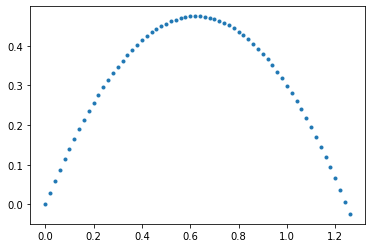

In [29]:
pos_list = np.array(pos_list)
plt.plot(pos_list[:, 0], pos_list[:, 1], '.');

__17.__ _Single Particle MD:_ Use the Verlet algorithm to integrate the 2D equation of motion for a point particle trapped in a box with (a) hard (reflecting) walls, or (b) periodic boundary conditions. Start from a random initial position and velocity and visualize the trajectory. 

In [30]:
# Box with hard walls
pos = np.random.random(2)
vel = np.random.random(2)
acc = np.zeros(2)
dt = 0.01
pos_list = [pos]
    
for _ in range (3000):
    pos = pos + vel * dt + acc * dt**2 / 2
    vel = vel + (acc + acc) / 2 * dt
    if pos[0] >= 1 or pos[0] <= 0:
        vel[0] = -vel[0]
    if pos[1] >= 1 or pos[1] <= 0:
        vel[1] = -vel[1]
    pos_list.append(pos)
pos_list = np.array(pos_list)

In [31]:
%%capture
fig = plt.figure()
ax = fig.add_subplot(111, autoscale_on=False, xlim=(0, 1), ylim=(0, 1))
ax.set_aspect('equal')
line, = ax.plot([], [], 'o-', linestyle="")
time_template = 'time = %.1fs'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)

def init():
    line.set_data([], [])
    time_text.set_text('')
    return line, time_text

def animate(i):
    thisx = [pos_list[i, 0]]
    thisy = [pos_list[i, 1]]
    line.set_data(thisx, thisy)
    time_text.set_text(time_template % (i * dt))
    return line, time_text

ani = animation.FuncAnimation(fig, animate, np.arange(1, len(pos_list[:, 0])), interval=10, blit=True, init_func=init)
Writer = animation.writers['ffmpeg']
writer = Writer(fps=100, bitrate=200)
# ani.save('17_hard_box.mp4', writer=writer)

In [32]:
# Box with periodic boundary condition
pos = np.random.random(2)
vel = np.random.random(2)
acc = np.zeros(2)
dt = 0.01
pos_list = [pos]

for _ in range (3000):
    pos = pos + vel * dt + acc * dt**2 / 2
    vel = vel + (acc + acc) / 2 * dt
    pos = pos % 1
    pos_list.append(pos)
pos_list = np.array(pos_list)

In [33]:
%%capture
fig = plt.figure()
ax = fig.add_subplot(111, autoscale_on=False, xlim=(0, 1), ylim=(0, 1))
ax.set_aspect('equal')
line, = ax.plot([], [], 'o-', linestyle="")
time_template = 'time = %.1fs'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)

def init():
    line.set_data([], [])
    time_text.set_text('')
    return line, time_text

def animate(i):
    thisx = [pos_list[i, 0]]
    thisy = [pos_list[i, 1]]
    line.set_data(thisx, thisy)
    time_text.set_text(time_template % (i * dt))
    return line, time_text

ani = animation.FuncAnimation(fig, animate, np.arange(1, len(pos_list[:, 0])), interval=10, blit=True, init_func=init)
Writer = animation.writers['ffmpeg']
writer = Writer(fps=100, bitrate=200)
# ani.save('17_periodic_box.mp4', writer=writer)

__18.__ _The two-ball bounce problem:_ Adopt your MD program to simulate the motion of two balls (hard spheres) within the square box with (a) hard (reflecting) walls, or (b) periodic boundary conditions. The balls are bounced from each other once in touch. Start from random initial positions and plot the trajectories. 

In [34]:
# Box with hard walls
pos_1 = np.random.random(2)
vel_1 = np.random.random(2)
acc_1 = np.zeros(2)
pos_2 = np.random.random(2)
vel_2 = np.random.random(2)
acc_2 = np.zeros(2)
dt = 0.01
pos_list_1 = [pos_1]
pos_list_2 = [pos_2]
radius = 0.25
    
for _ in range (3000):
    pos_1 = pos_1 + vel_1 * dt + acc_1 * dt**2 / 2
    pos_2 = pos_2 + vel_2 * dt + acc_2 * dt**2 / 2
    vel_1 = vel_1 + (acc_1 + acc_1) / 2 * dt
    vel_2 = vel_2 + (acc_2 + acc_2) / 2 * dt
    dist = (pos_1[0] - pos_2[0])**2 + (pos_1[1] - pos_2[1])**2
    if dist <= radius**2:
        vel_1 -= np.dot(vel_1 - vel_2, pos_1 - pos_2) * (pos_1 - pos_2) / dist
        vel_2 -= np.dot(vel_2 - vel_1, pos_2 - pos_1) * (pos_2 - pos_1) / dist
    if pos_1[0] >= 1 or pos_1[0] <= 0:
        vel_1[0] = -vel_1[0]
    if pos_1[1] >= 1 or pos_1[1] <= 0:
        vel_1[1] = -vel_1[1]
    if pos_2[0] >= 1 or pos_2[0] <= 0:
        vel_2[0] = -vel_2[0]
    if pos_2[1] >= 1 or pos_2[1] <= 0:
        vel_2[1] = -vel_2[1]
    pos_list_1.append(pos_1)
    pos_list_2.append(pos_2)
pos_list_1 = np.array(pos_list_1)
pos_list_2 = np.array(pos_list_2)

In [35]:
%%capture
fig = plt.figure()
ax = fig.add_subplot(111, autoscale_on=False, xlim=(0, 1), ylim=(0, 1))
ax.set_aspect('equal')
line, = ax.plot([], [], 'o-', linestyle="")
time_template = 'time = %.1fs'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)

def init():
    line.set_data([], [])
    time_text.set_text('')
    return line, time_text

def animate(i):
    thisx = [pos_list_1[i, 0], pos_list_2[i, 0]]
    thisy = [pos_list_1[i, 1], pos_list_2[i, 1]]
    line.set_data(thisx, thisy)
    time_text.set_text(time_template % (i * dt))
    return line, time_text

ani = animation.FuncAnimation(fig, animate, np.arange(1, len(pos_list_1[:, 0])), interval=10, blit=True, init_func=init)
Writer = animation.writers['ffmpeg']
writer = Writer(fps=100, bitrate=200)
# ani.save('18_hard_box.mp4', writer=writer)

In [36]:
# Box with periodic boundary condition
pos_1 = np.random.random(2)
vel_1 = np.random.random(2)
acc_1 = np.zeros(2)
pos_2 = np.random.random(2)
vel_2 = np.random.random(2)
acc_2 = np.zeros(2)
dt = 0.01
pos_list_1 = [pos_1]
pos_list_2 = [pos_2]
radius = 0.25
    
for _ in range (3000):
    pos_1 = pos_1 + vel_1 * dt + acc_1 * dt**2 / 2
    pos_2 = pos_2 + vel_2 * dt + acc_2 * dt**2 / 2
    vel_1 = vel_1 + (acc_1 + acc_1) / 2 * dt
    vel_2 = vel_2 + (acc_2 + acc_2) / 2 * dt
    pos_1 = pos_1 % 1
    pos_2 = pos_2 % 1
    dist = (pos_1[0] - pos_2[0])**2 + (pos_1[1] - pos_2[1])**2
    if dist <= radius**2:
        vel_1 -= np.dot(vel_1 - vel_2, pos_1 - pos_2) * (pos_1 - pos_2) / dist
        vel_2 -= np.dot(vel_2 - vel_1, pos_2 - pos_1) * (pos_2 - pos_1) / dist
    pos_list_1.append(pos_1)
    pos_list_2.append(pos_2)
pos_list_1 = np.array(pos_list_1)
pos_list_2 = np.array(pos_list_2)

In [37]:
%%capture
fig = plt.figure()
ax = fig.add_subplot(111, autoscale_on=False, xlim=(0, 1), ylim=(0, 1))
ax.set_aspect('equal')
line, = ax.plot([], [], 'o-', linestyle="")
time_template = 'time = %.1fs'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)

def init():
    line.set_data([], [])
    time_text.set_text('')
    return line, time_text

def animate(i):
    thisx = [pos_list_1[i, 0], pos_list_2[i, 0]]
    thisy = [pos_list_1[i, 1], pos_list_2[i, 1]]
    line.set_data(thisx, thisy)
    time_text.set_text(time_template % (i * dt))
    return line, time_text

ani = animation.FuncAnimation(fig, animate, np.arange(1, len(pos_list_1[:, 0])), interval=10, blit=True, init_func=init)
Writer = animation.writers['ffmpeg']
writer = Writer(fps=100, bitrate=200)
# ani.save('18_periodic_box.mp4', writer=writer)

__19.__ _Normal random distribution:_ For 1000 identical point-particles of the same mass as a water molecule, we need to initialize the velocities according to a [Maxwell-Boltzmann distribution](https://en.wikipedia.org/wiki/Maxwell%E2%80%93Boltzmann_distribution) at room temperature. Write a short subroutine to do it. Then plot the distribution of the particles speed (i.e. the magnitude of the velocity vector). The histogram should look like [this plot](https://en.wikipedia.org/wiki/Maxwell%E2%80%93Boltzmann_distribution#/media/File:MaxwellBoltzmann-en.svg). 

In [38]:
num = 1000
mass = 18 / 6.022 * 1e-26 
temp = 300
kB = 1.38e-23
ekin_0 = 3 / 2 * kB * temp
vel = np.random.normal(0, 1, (3, num))
vel_cm = np.mean(vel, axis=1)
for i in range(3):
    vel[i] -= vel_cm[i]
ekin = mass * np.mean(vel**2) / 2
coef = np.sqrt(ekin_0 / ekin)
vel *= coef 

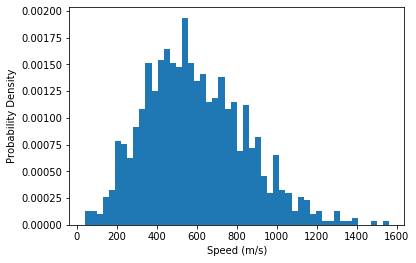

In [39]:
plt.xlabel("Speed (m/s)")
plt.ylabel("Probability Density")
plt.hist(np.sqrt(np.mean(vel**2, axis=0)), bins=50, density=True)
plt.show()

__20.__ _MC:_ Generate N pairs of random numbers uniformly distributed on the unit square. Evaluate π as explained in the lecture and visualized [here](https://en.wikipedia.org/wiki/Pi#/media/File:Pi_30K.gif). Plot the error versus N.

In [40]:
N_list = np.arange(1, 10000, 10)
error = []
for N in N_list:
    x = np.random.uniform(size=N)
    y = np.random.uniform(size=N)
    counter = 0
    for i in range(N):
        if x[i]**2 + y[i]**2 < 1:
            counter += 1
    error.append(abs(counter / N * 4 - np.pi))

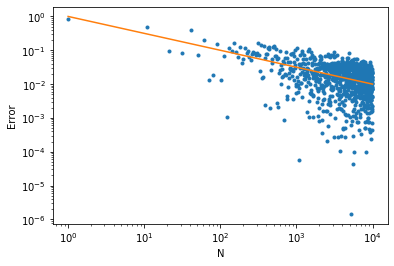

In [41]:
plt.xlabel("N")
plt.ylabel("Error")
plt.loglog(N_list, error, '.')
plt.plot(N_list, N_list**-0.5);

- error is $O(\sqrt{n})$ 

__21.__ _MC integration:_ Generate N numbers uniformly distributed within $[0,π]$. Evaluate the integral of $\sin(x)$ within $[0,π]$ using the MC integration method explained in the class. Plot the error versus N and determine the error scaling. 

In [42]:
N_list = np.arange(1, 10000, 10)
error = []
interval = [0, np.pi / 2]
for N in N_list:
    x = np.random.random(N) * (interval[1] - interval[0]) + interval[0] 
    integral = 0
    for i in range(N):
        integral += np.sin(x[i]) * (interval[1] - interval[0]) / N
    error.append(abs(1 - integral))

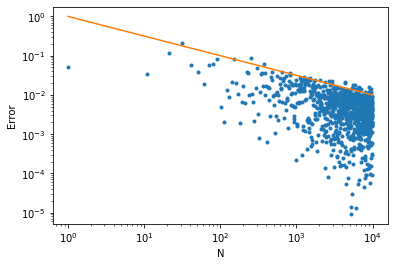

In [43]:
plt.xlabel("N")
plt.ylabel("Error")
plt.loglog(N_list, error, '.')
plt.plot(N_list, N_list**-0.5);

- error is $O(\sqrt{n})$ 

__22.__ _Markov chain:_ Make a Markov chain by 1D random walker. The walker takes steps of equal length but in a random direction (50% to the right, 50% to the left). Plot the distance from the origin, $|x|$, as a function of time (step index). What is the slope of the linear part if any, what is its meaning?

In [44]:
pos = 0
distance = []
steps = np.random.choice([-1, 1], size=1000)
for step in steps:
    pos += step
    distance.append(abs(pos))

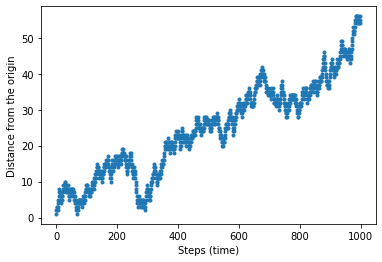

In [45]:
plt.xlabel("Steps (time)")
plt.ylabel("Distance from the origin")
plt.plot(distance, '.');

__23.__ _Random walk:_ Starting from the origin $(0,0,0)$, choose a random direction in 3D space and take a step of length one in that direction. For some $N=1000$ steps, plot the trajectory. Then plot also the distance to the origin, $\sqrt{x^2+y^2+z^2}$, as a function of the step number (Note: Make an ensemble of 100 walkers, and calculate the distance as the ensemble average.)

In [46]:
init_pos = [0, 0, 0]
distance = []
walkers = np.arange(1, 100)
steps = np.arange(1000)
for walker in walkers:
    dist = []
    for step in steps:
        theta = np.pi * np.random.random(step)
        phi = 2 * np.pi * np.random.random(step)
        pos = [0, 0, 0]
        for stp in range(step):
            pos[0] += np.sin(theta[stp]) * np.cos(phi[stp])
            pos[1] += np.sin(theta[stp]) * np.sin(phi[stp])
            pos[2] += np.cos(theta[stp])
        dist.append(np.sqrt((init_pos[0] - pos[0])**2 + (init_pos[1] - pos[1])**2 + (init_pos[2] - pos[2])**2))
    distance.append(dist)
distance = np.mean(distance, axis=0)

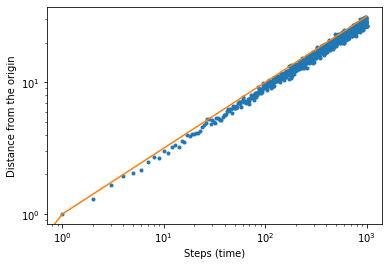

In [47]:
plt.xlabel("Steps (time)")
plt.ylabel("Distance from the origin")
plt.loglog(steps, distance, '.')
plt.plot(steps, np.sqrt(steps))
plt.show()

- Distance from the origin is $O(\sqrt{time})$ 

__24.__ _Machine Learning (k-means):_ 

- __1D:__ Split up the following datapoints into two groups using the k-means algorithm: 10, 23, 15, 9, 32, 27, 8, 14, 35, 24. 

- __2D:__ [This set of x-y datapoints](http://comphys.sbu.ac.ir/teach/F18/ML/2D.txt) is spread around 4 peaks. Group them into 4 groups and visualize it in a scatter plot with different colors for different groups. Now, repeat the grouping procedure but split the same data set into 3 groups. Explain your observation on a new scatter plot. 

__25.__ _Machine Learning (Kernel ridge regression):_ 
- __(a)__ Generate training data set yourself: For 100 values of x, randomly distributed in $[-10,20]$, calculate the target function $y(x)=\frac{\sin(x)}{x}+0.1\cos(\frac{x}{2})$ and add a random noise (between -0.2 to 0.2) to them. Store the 100 $(x,y)$ pairs as the training input set. 
- __(b)__ Train your KRR model to this set (with $\lambda=0.001$ and $\sigma=1$). You need to solve the system of equation $(K+\lambda I)C=y$ for the vector of coefficients $C$, where the covariance matrix reads $K_{ij}=\exp(\frac{-|x_i-x_j|^2}{\sigma^2})$ and $I$ is the identity matrix while the vector $y$ contains the target y-values from the training set. 
- __(c)__ Validate your KRR model. For e.g. one thousand of x values, estimate $y_{ML}(x) = \sum c_i \exp(\frac{-|x-x_i|^2}{\sigma^2})$. Compare your predicted value with the true one $y(x)=\frac{\sin(x)}{x}+0.1\cos(\frac{x}{2})$ either by visualizing on a plot, or by calculating $RMSE=\frac{1}{N} \sum(y_{ML}(x_i)-y(x_i))^2$, and report it. 
- __(d)__ _(OPTIONAL)_ Search for the hyper-parameters $\sigma$ and $\lambda$ that lead to the smallest RMSE.